In [53]:
!pip install arch

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#module pour la statistique :
import scipy.stats as stats
import statsmodels.stats.descriptivestats as smd
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima.model import ARIMA


#test de stationnarité
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from statsmodels.tsa.stattools import kpss


#ACF PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#module pour nos neurones
import tensorflow as tf
from tensorflow import keras

#RNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU ,Dropout ,SimpleRNN

#module pour les module de regression classique
from sklearn.linear_model import LinearRegression

#module pour le traitement de nos donnés
from sklearn.preprocessing import StandardScaler

# metric de sklearn
from sklearn.metrics import  mean_squared_error, mean_absolute_error ,r2_score

tf.config.run_functions_eagerly(True) # pour activer la convertion de numpy en tenseur
#fixons la graine pour la reproduction des random
np.random.seed(42)


chargement of data

In [55]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/elm19/GoldSpot-Predictor/refs/heads/main/data/processed-data/meged_data_all.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)
df.sort_index(inplace=True)


data exploration


In [56]:
df.head()

,Close,Open,High,Low,Vol.,Change %,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,...,Event_Unemployment Rate DEC,Event_Unemployment Rate FEB,Event_Unemployment Rate JAN,Event_Unemployment Rate JUL,Event_Unemployment Rate JUN,Event_Unemployment Rate MAR,Event_Unemployment Rate NOV,Event_Unemployment Rate OCT,Event_Unemployment Rate SEP,Event_Winter Economy Plan
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1281.3,1283.0,1286.5,1279.7,113260.0,-0.13%,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-02,1284.1,1285.0,1291.0,1280.6,235330.0,0.22%,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-03,1294.8,1288.5,1296.9,1286.4,244540.0,0.83%,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-04,1285.8,1296.5,1300.4,1278.1,316060.0,-0.70%,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-05,1285.8,1296.5,1300.4,1278.1,316060.0,-0.70%,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1796 entries, 2019-01-01 to 2023-12-01
Columns: 499 entries, Close to Event_Winter Economy Plan
dtypes: float64(498), object(1)
memory usage: 6.9+ MB


In [58]:
df.describe()


,Close,Open,High,Low,Vol.,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,...,Event_Unemployment Rate DEC,Event_Unemployment Rate FEB,Event_Unemployment Rate JAN,Event_Unemployment Rate JUL,Event_Unemployment Rate JUN,Event_Unemployment Rate MAR,Event_Unemployment Rate NOV,Event_Unemployment Rate OCT,Event_Unemployment Rate SEP,Event_Winter Economy Plan
count,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,...,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000
mean,1738.391425,1738.451726,1750.686637,1725.864755,109918.880846,0.096882,0.045657,0.006682,0.035635,0.106347,...,0.001670,0.001670,0.002227,0.001114,0.001114,0.002227,0.001114,0.000557,0.001114,0.000557
std,204.994955,205.301183,206.944143,203.079376,140039.235572,0.295879,0.208798,0.081490,0.185429,0.308368,...,0.040847,0.040847,0.047153,0.033361,0.033361,0.047153,0.033361,0.023596,0.033361,0.023596
min,1270.600000,1271.500000,1275.000000,1265.900000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1640.625000,1635.725000,1651.000000,1618.250000,880.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1793.500000,1793.700000,1805.200000,1781.750000,5510.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1892.650000,1894.850000,1904.675000,1879.600000,215370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2080.400000,2062.400000,2086.200000,2047.500000,813410.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
columns_list = df.columns.tolist()

with open('columns_list.txt', 'w') as f:
  for column in columns_list:
    f.write(f'{column}\n')

# les colonne macro donner manque au data merge .

In [60]:
print('nombre de ligne     :',df.shape[0])
missing_values=df.isnull().sum()
print(missing_values)

nombre de ligne     : 1796
Close                          0
Open                           0
High                           0
Low                            0
Vol.                           0
                              ..
Event_Unemployment Rate MAR    0
Event_Unemployment Rate NOV    0
Event_Unemployment Rate OCT    0
Event_Unemployment Rate SEP    0
Event_Winter Economy Plan      0
Length: 499, dtype: int64


In [61]:
print(missing_values.sum())
print(df.columns.isna().sum())

0
0


In [62]:
0 if df.index.duplicated().any() else 1

1

none duplicated value

In [63]:
close_price_data=df[["Close"]].copy()

In [64]:
close_price_data.head()

,Close
Date,
2019-01-01,1281.3
2019-01-02,1284.1
2019-01-03,1294.8
2019-01-04,1285.8
2019-01-05,1285.8


In [65]:
print("donner allant de ",close_price_data.index.min(),"a",close_price_data.index.max())

donner allant de  2019-01-01 00:00:00 a 2023-12-01 00:00:00


# close price prediction only based on *him*

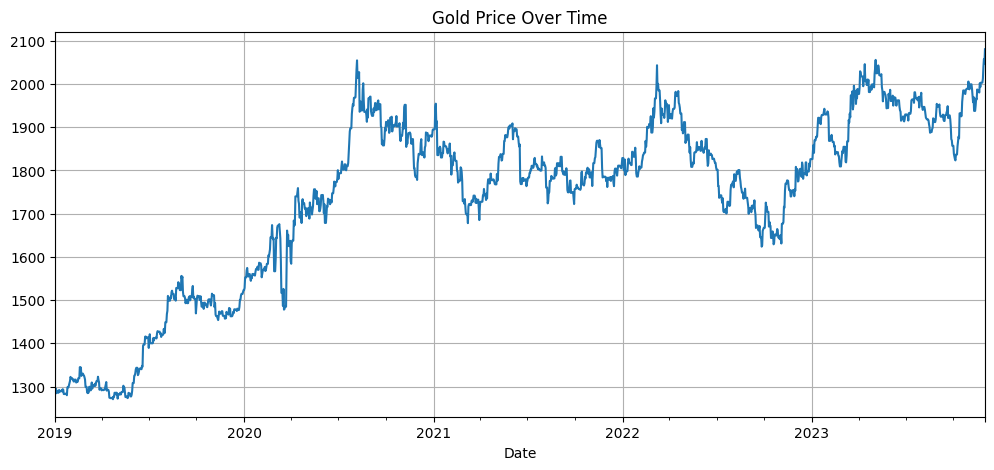

In [66]:
import matplotlib.pyplot as plt

close_price_data["Close"].plot(figsize=(12, 5), title="Gold Price Over Time")
plt.grid()
plt.show()


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

def time_series_visualisation(df, date_col=None, y='value', xlabel='Date', ylabel='Value',
                              title="Title of your series", figsize=(15, 10), dpi=100,
                              show_symetric_neg_value=False, fontsize=12,
                              Seasonal_Plot=True, alpha=0.7, boxplot=True, rolling_window=12):
    """
    Visualisation complète d'une série temporelle.

    Paramètres :
    - df : DataFrame contenant la série temporelle
    - date_col : nom de la colonne date (ou None si elle est déjà en index)
    - y : nom de la colonne valeur
    - xlabel, ylabel, title : labels et titre
    - figsize, dpi : taille de la figure
    - show_symetric_neg_value : booléen pour afficher une version symétrique
    - fontsize : taille du texte des annotations
    - Seasonal_Plot : booléen pour afficher les variations saisonnières
    - alpha : transparence des graphes
    - boxplot : booléen pour afficher les boxplots
    - rolling_window : taille de la fenêtre glissante
    """

    # === Préparation des données ===
    df = df.copy()
    if date_col:
        df[date_col] = pd.to_datetime(df[date_col])
        df.set_index(date_col, inplace=True)
    df.sort_index(inplace=True)

    # On s’assure que les colonnes nécessaires existent
    if y not in df.columns:
        raise ValueError(f"La colonne '{y}' n'existe pas dans le DataFrame.")

    # Réinitialiser l’index pour certains tracés
    df_reset = df.reset_index()

    # Création de la figure
    fig, axes = plt.subplots(5, 2, figsize=figsize, dpi=dpi)
    axes = axes.flatten()

    # === 1. Graphique standard ===
    axes[0].plot(df.index, df[y], label='Série Temporelle')
    axes[0].set(title=title, xlabel=xlabel, ylabel=ylabel)
    axes[0].legend()


    # === 2. Vue symétrique ===
    if show_symetric_neg_value and (df[y] >= 0).all():
        axes[1].fill_between(df.index, df[y], -df[y], alpha=0.5, linewidth=2, color='seagreen')
        axes[1].hlines(y=0, xmin=df.index.min(), xmax=df.index.max(), linewidth=0.5)
        axes[1].set(title=f'{title} (Vue Symétrique) \n Ce graphique compare la série avec sa valeur opposée pour observer la symétrie.', xlabel=xlabel, ylabel='Symétrie')
    else:
        axes[1].axis('off')  # Si non pertinent, on désactive

    # === 3. Graphique saisonnier ===
    if Seasonal_Plot:
        df_reset['year'] = df_reset[date_col if date_col else df.index.name].dt.year
        df_reset['month'] = df_reset[date_col if date_col else df.index.name].dt.strftime('%b')
        years = df_reset['year'].unique()

        colors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)
        for i, year in enumerate(years):
            subset = df_reset[df_reset['year'] == year]
            axes[2].plot(subset['month'], subset[y], label=year, color=colors[i])
        axes[2].set(xlabel='Mois', ylabel=ylabel)
        axes[2].set_title("Graphique saisonnier \n Permet d'observer les variations saisonnières d'une année à l'autre.")
        axes[2].legend()
    else:
        axes[2].axis('off')

    # === 4. Histogramme & densité ===
    sns.histplot(df[y], kde=True, ax=axes[3], bins=30)
    axes[3].set_title("Histogramme et densité des valeurs \n Visualise la distribution des valeurs de la série. ")

    # === 5. Moyenne & écart-type glissants ===
    rolling_mean = df[y].rolling(rolling_window).mean()
    rolling_std = df[y].rolling(rolling_window).std()
    axes[4].plot(df.index, rolling_mean, label='Moyenne glissante')
    axes[4].fill_between(df.index, rolling_mean - rolling_std, rolling_mean + rolling_std, alpha=0.2, label='Écart-type')
    axes[4].set_title("Moyenne et écart-type glissants \n Montre l’évolution de la tendance et de la volatilité.")
    axes[4].legend()


    # === 6. Lag Plot ===
    axes[5].scatter(df[y][:-1], df[y][1:], alpha=alpha)
    axes[5].set_title("Lag Plot (y(t) vs y(t-1))  \n Affiche la relation entre une valeur et celle de la période précédente.")

    # === 7 & 8. Boxplots ===
    if boxplot:
        sns.boxplot(x='year', y=y, data=df_reset, ax=axes[6])
        axes[6].set_title('Boxplot par année (Tendance) \n Répartition des valeurs par année.' )

        sns.boxplot(x='month', y=y, data=df_reset, ax=axes[7])
        axes[7].set_title('Boxplot par mois (Saisonnalité) \n  Montre les variations saisonnières typiques. ')

    else:
        axes[6].axis('off')
        axes[7].axis('off')

    # === Graphiques restants vides ===
    for i in range(8, 10):
        axes[i].axis('off')

    plt.subplots_adjust(hspace=0.6)
    plt.tight_layout()
    plt.show()



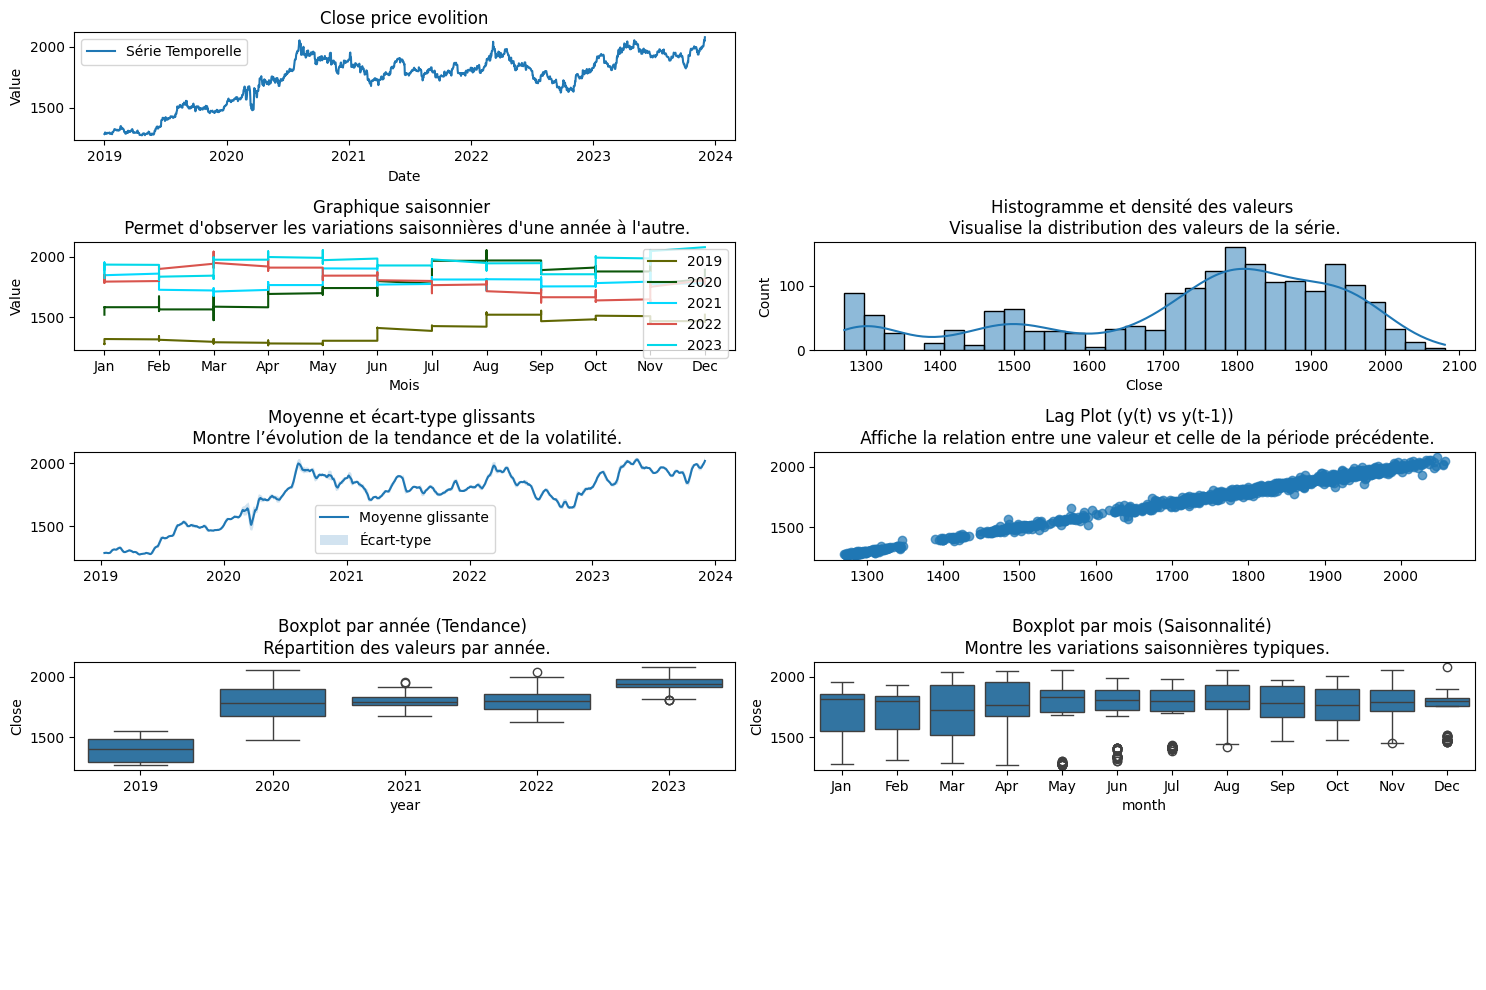

In [68]:
time_series_visualisation(close_price_data, xlabel='Date', ylabel='Value', title="Close price evolition",y='Close') # Changed y to 'Close'

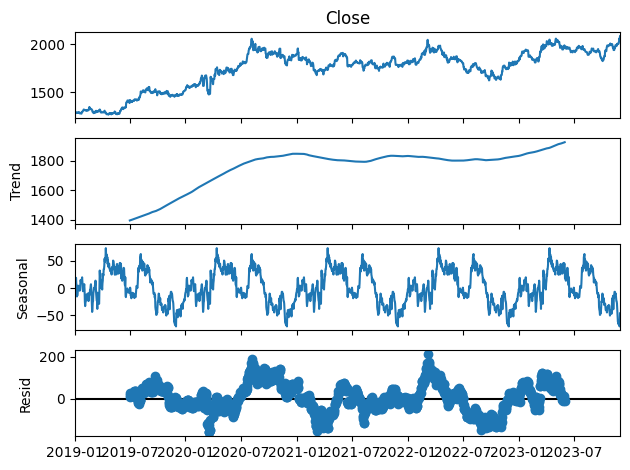

In [69]:
result = seasonal_decompose(close_price_data["Close"], model="additive", period=365)   #period = 365  car d apres le plot precedant de la serie je suppose une tendance annuelle
result.plot()
plt.tight_layout()
plt.show()

TEST DE STATIONNARITE

In [70]:
def time_series_statinnary_test(col_on_test , ADF=True , KPSS=True , PP=True) :
  """
  pour les 3 tests de stationnarité
  bibliotheque necessaire :
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.tsa.stattools import kpss
    from arch.unitroot import PhillipsPerron
  """
  if ADF :
        result_adf = adfuller(col_on_test)
        print("Test ADF:")
        print(f"Statistic: {result_adf[0]:.4f}")
        print(f"P-value: {result_adf[1]:.4f}")

        if result_adf[1] <= 0.05:
          print("\nLa série est stationnaire (p-value ≤ 0.05).")
        else:
          print("\nLa série n'est pas stationnaire (p-value > 0.05).")

  if KPSS :
        result_kpss = kpss(col_on_test)
        print(f"\n \n Test KPSS: p-value = {result_kpss[1]:.4f}")

        if result_kpss[1] > 0.05:
          print("\n La série est stationnaire car p-value > 0.05 ")
        else:
          print("\n La série n'est pas stationnaire car p-value ≤ 0.05")

  if PP :
    result_pp = PhillipsPerron(col_on_test)
    print(f"\n \n Test PP: p-value = {result_pp.pvalue:.4f}")
    if result_pp.pvalue <= 0.05 :
      print("\n La série est stationnaire car p-value ≤ 0.05 ")
    else :
     print("\n La série n'est pas stationnaire car p-value > 0.05")




In [71]:
time_series_statinnary_test(close_price_data["Close"])

Test ADF:
Statistic: -1.7359
P-value: 0.4127

La série n'est pas stationnaire (p-value > 0.05).

 
 Test KPSS: p-value = 0.0100

 La série n'est pas stationnaire car p-value ≤ 0.05

 
 Test PP: p-value = 0.3911

 La série n'est pas stationnaire car p-value > 0.05


<ipython-input-70-1179f764ca46>:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(col_on_test)


traitement des données

In [72]:
Scaler_Serie = StandardScaler()
Serie =close_price_data[["Close"]].values.reshape(-1,1)
Scaler_Serie.fit(Serie)
Serie_scaled = Scaler_Serie.transform(Serie)



fonction de fenetrage

In [73]:
def window(serie , w , step =1):
  #X constitue les features
  #y = les label
  X=[]
  y = []
  for i in range(0,len(serie)-w,step):
      k = i+w
      X.append(serie[i:k])
      y.append(serie[k])

  X=np.array(X)
  X=X.reshape(X.shape[0], X.shape[1])
  y=np.array(y)
  y=y.flatten()
  return X , y




passon au split

In [74]:
w=1
X_windowed , Y_windowed = window(Serie_scaled , 5 , step =1)
test_size = 0.3
train_size = int(len(X_windowed)*(1-test_size))
X_train= X_windowed[:train_size]
X_test = X_windowed[train_size:]
y_train= Y_windowed[:train_size]
y_test= Y_windowed[train_size:]



applcation de model standard pour predire la serie

regression lineaire

In [75]:
def plot_series(time , series , format = "-",start = 0 , end = None , label = None,title = None ):
  """
  definition de notre fonction pour le plot de la time serie :
    time = interalle ed temps
    series =  les valeur de la serie
    start , end = plage d indices de temps a tracer
    label  = eqiuette  pour notre legende
  """
  time = time[len(time) - len(series):]
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.title(title)
  plt.grid(True)
  if label:
        plt.legend()



In [76]:
len(Serie_scaled)

1796

sklearn linear Regression
MSE :  0.004433502695506097
MAE :  0.04249575414838928
R² :  0.9851833229114805


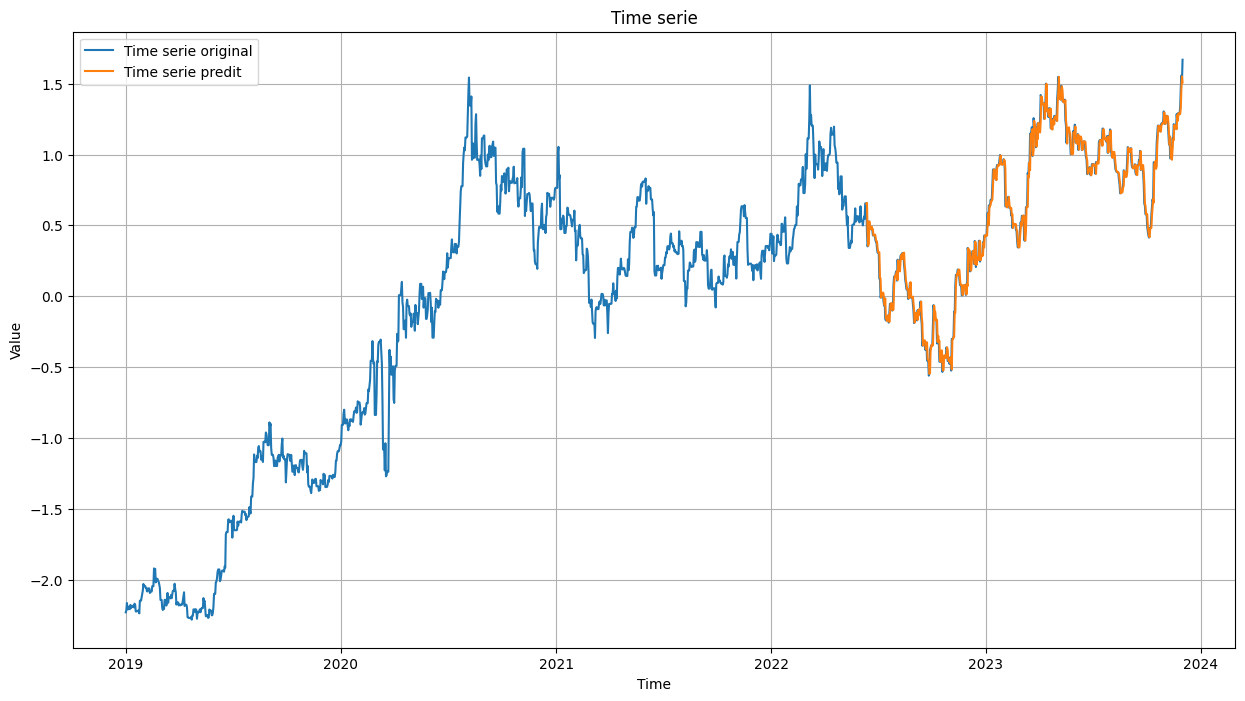

In [77]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

y_LR = model_LR.predict(X_test)
time = close_price_data.index
plt.figure(figsize=(15,8))
plot_series(time , Serie_scaled , format = "-",start = 0 , end = None ,label = 'Time serie original' ,title = "Time serie" )
plot_series(time[int(len(Serie_scaled)*(1-0.3))+w:len(Serie_scaled) ] , y_LR,start = 0 , end = None , format = "-", label = 'Time serie predit' ,title = "Time serie" )

# évaluatino du model
print('sklearn linear Regression')
MSE_LR = mean_squared_error(y_test , y_LR)
MAE_LR = mean_absolute_error(y_test , y_LR)
R2_LR = r2_score(y_test , y_LR)
print('MSE : ',MSE_LR)
print('MAE : ',MAE_LR)
print('R² : ',R2_LR)

DecisionTreeRegressor
MSE :  0.004433502695506097
MAE :  0.04249575414838928
R² :  0.9851833229114805
----------------------------------------


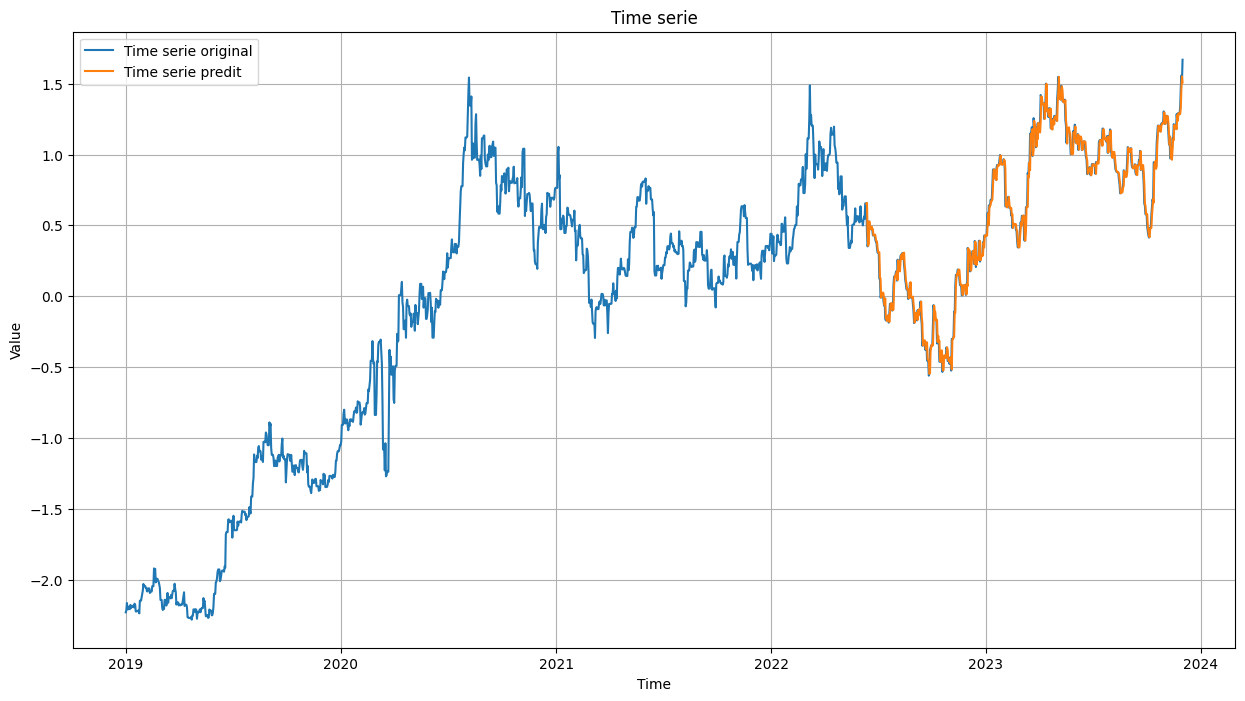

In [78]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

model_DecisionTreeRegressor = DecisionTreeRegressor(random_state = 0 ,max_depth = 10)
model_DecisionTreeRegressor.fit(X_train,y_train)

y_test_predict_DecisionTreeRegressor = model_DecisionTreeRegressor.predict(X_test)

y_test_predict_DecisionTreeRegressor = model_LR.predict(X_test)
plt.figure(figsize=(15,8))
plot_series(time , Serie_scaled , format = "-",start = 0 , end = None ,label = 'Time serie original' ,title = "Time serie" )
plot_series(time[int(len(Serie_scaled)*(1-0.3))+w:len(Serie_scaled) ] , y_test_predict_DecisionTreeRegressor,start = 0 , end = None , format = "-", label = 'Time serie predit' ,title = "Time serie" )

#evaluation
MSE_DecisionTreeRegressor = mean_squared_error(y_test , y_test_predict_DecisionTreeRegressor)
MAE_DecisionTreeRegressor = mean_absolute_error(y_test , y_test_predict_DecisionTreeRegressor)
R2_DecisionTreeRegressor = r2_score(y_test , y_test_predict_DecisionTreeRegressor)

print('DecisionTreeRegressor')
print('MSE : ',MSE_DecisionTreeRegressor)
print('MAE : ',MAE_DecisionTreeRegressor)
print('R² : ',R2_DecisionTreeRegressor)

print('--'*20)

Mais attention :

✅ Ça donne des prédictions correctes sur les données  très proches,
❌ Mais ces modèles ne généralisent pas bien dans le futur lointain, surtout si la série change de tendance.

il faut differencier pour avoir des prediction robuste a long terme

In [79]:
ts_diff = close_price_data[["Close"]].diff().dropna()


In [80]:
time_series_statinnary_test(ts_diff)

Test ADF:
Statistic: -14.3309
P-value: 0.0000

La série est stationnaire (p-value ≤ 0.05).

 
 Test KPSS: p-value = 0.1000

 La série est stationnaire car p-value > 0.05 

 
 Test PP: p-value = 0.0000

 La série est stationnaire car p-value ≤ 0.05 


<ipython-input-70-1179f764ca46>:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(col_on_test)


In [81]:
Scaler_Serie = StandardScaler()
Serie =ts_diff.values.reshape(-1,1)
Scaler_Serie.fit(Serie)
Serie_scaled = Scaler_Serie.transform(Serie)

w=1
X_windowed , Y_windowed = window(Serie_scaled , 5 , step =1)
test_size = 0.3
train_size = int(len(X_windowed)*(1-test_size))
X_train= X_windowed[:train_size]
X_test = X_windowed[train_size:]
y_train= Y_windowed[:train_size]
y_test= Y_windowed[train_size:]



sklearn linear Regression
MSE :  0.8837120802732361
MAE :  0.6035817312880879
R² :  -0.005281265950114689


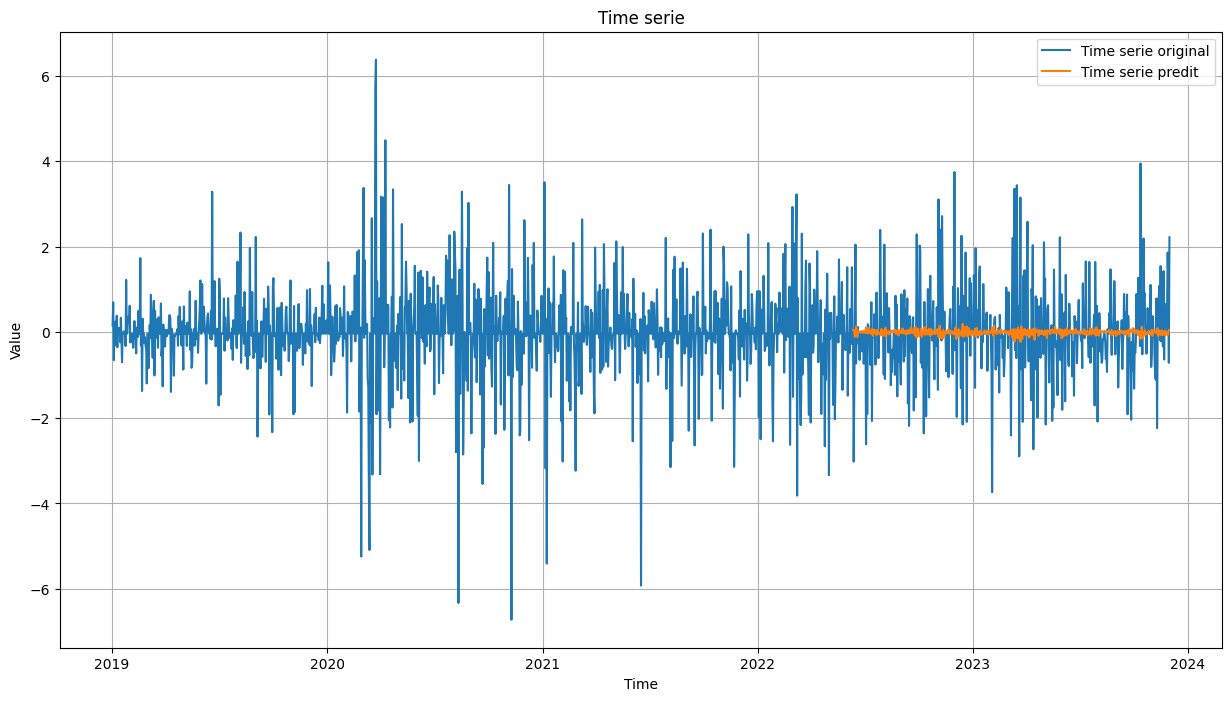

In [82]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

y_LR = model_LR.predict(X_test)
time = close_price_data.index
plt.figure(figsize=(15,8))
plot_series(time , Serie_scaled , format = "-",start = 0 , end = None ,label = 'Time serie original' ,title = "Time serie" )
plot_series(time[int(len(Serie_scaled)*(1-0.3))+w:len(Serie_scaled) ] , y_LR,start = 0 , end = None , format = "-", label = 'Time serie predit' ,title = "Time serie" )

# évaluatino du model
print('sklearn linear Regression')
MSE_LR = mean_squared_error(y_test , y_LR)
MAE_LR = mean_absolute_error(y_test , y_LR)
R2_LR = r2_score(y_test , y_LR)
print('MSE : ',MSE_LR)
print('MAE : ',MAE_LR)
print('R² : ',R2_LR)

 DecisionTreeRegressor
MSE :  0.8837120802732361
MAE :  0.6035817312880879
R² :  -0.005281265950114689
----------------------------------------


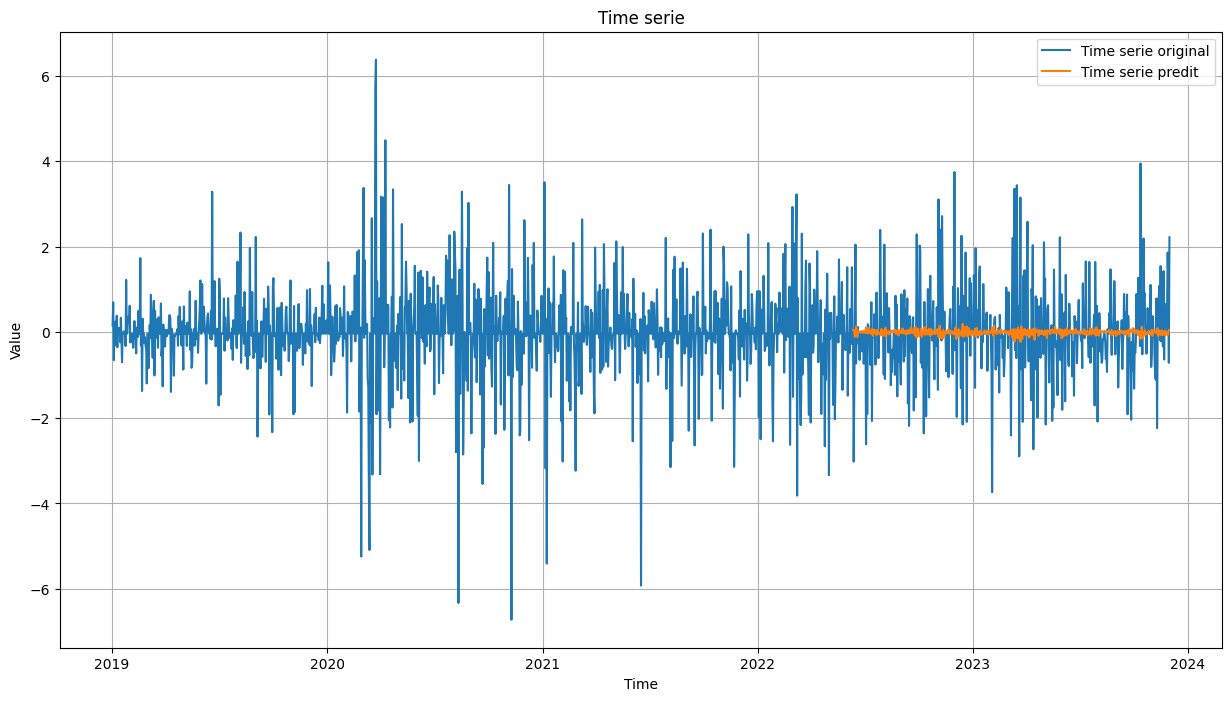

In [83]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

model_DecisionTreeRegressor = DecisionTreeRegressor(random_state = 0 ,max_depth = 10)
model_DecisionTreeRegressor.fit(X_train,y_train)

y_test_predict_DecisionTreeRegressor = model_DecisionTreeRegressor.predict(X_test)

y_test_predict_DecisionTreeRegressor = model_LR.predict(X_test)
plt.figure(figsize=(15,8))
plot_series(time , Serie_scaled , format = "-",start = 0 , end = None ,label = 'Time serie original' ,title = "Time serie" )
plot_series(time[int(len(Serie_scaled)*(1-0.3))+w:len(Serie_scaled)] , y_test_predict_DecisionTreeRegressor,start = 0 , end = None , format = "-", label = 'Time serie predit' ,title = "Time serie" )

#evaluation
MSE_DecisionTreeRegressor = mean_squared_error(y_test , y_test_predict_DecisionTreeRegressor)
MAE_DecisionTreeRegressor = mean_absolute_error(y_test , y_test_predict_DecisionTreeRegressor)
R2_DecisionTreeRegressor = r2_score(y_test , y_test_predict_DecisionTreeRegressor)

print(' DecisionTreeRegressor')
print('MSE : ',MSE_DecisionTreeRegressor)
print('MAE : ',MAE_DecisionTreeRegressor)
print('R² : ',R2_DecisionTreeRegressor)

print('--'*20)

1 neurone

In [84]:
model1 = keras.Sequential([
    keras.layers.Dense(units= 64 ,activation =None ,input_shape =[X_train.shape[1]]  ),
    keras.layers.Dense(units=1 ,activation ="linear"  ),
])

Adam=keras.optimizers.Adam(learning_rate=0.04)
model1.compile(optimizer=Adam , loss='mean_squared_error',metrics=['mae'])
history1 = model1.fit(X_train,y_train,epochs=10 , verbose=1, batch_size=100)
y_predict_ner=model1.predict(X_test)

model1.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 1.3311 - mae: 0.7807
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - loss: 1.0045 - mae: 0.6233
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - loss: 1.1355 - mae: 0.6421
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 1.0139 - mae: 0.6070
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 1.0964 - mae: 0.6295
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.9064 - mae: 0.5788
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 1.1282 - mae: 0.6371
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 1.1894 - mae: 0.6303
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 1.1281 - mae: 0.6248
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 1.3031 - mae: 0.6672
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,349 (5.27 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 900 (3.52 KB)

sklearn neurone Regression
MSE :  0.8907409790254363
MAE :  0.610343232154949
R² :  -0.013277105764437636


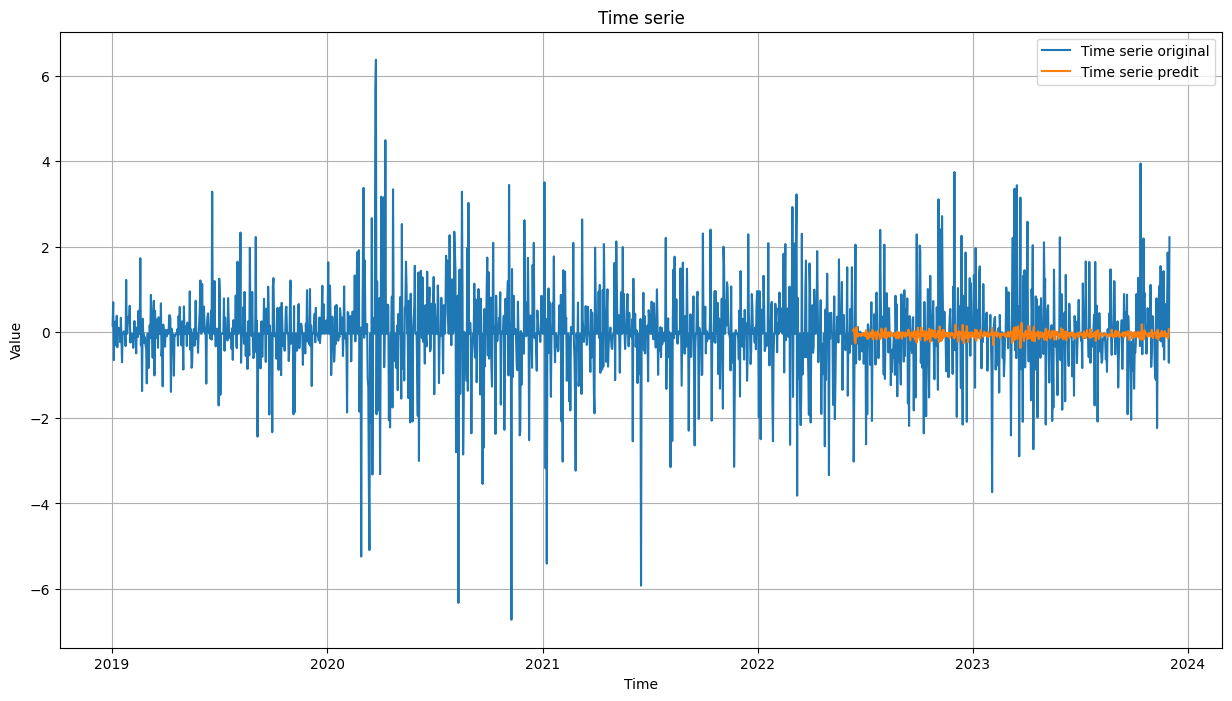

In [85]:
plt.figure(figsize=(15,8))
plot_series(time , Serie_scaled , format = "-",start = 0 , end = None ,label = 'Time serie original' ,title = "Time serie" )
plot_series(time[int(len(Serie_scaled)*(1-0.3))+w:len(Serie_scaled)] , y_predict_ner,start = 0 , end = None , format = "-", label = 'Time serie predit' ,title = "Time serie" )

# évaluatino du model
print('sklearn neurone Regression')
MSE_ner = mean_squared_error(y_test , y_predict_ner)
MAE_ner = mean_absolute_error(y_test , y_predict_ner)
R2_ner = r2_score(y_test , y_predict_ner)
print('MSE : ',MSE_ner)
print('MAE : ',MAE_ner)
print('R² : ',R2_ner)

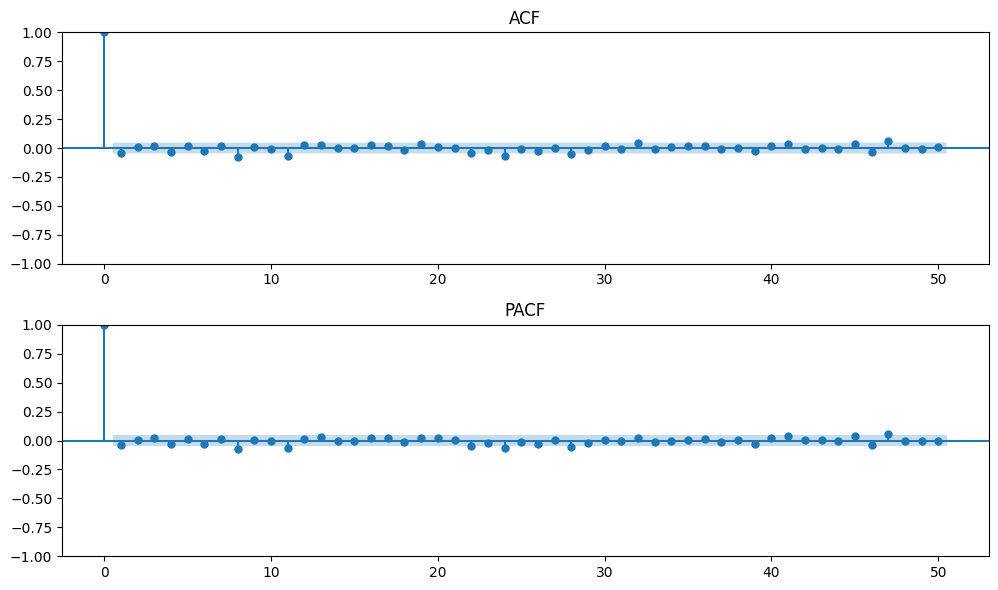

In [86]:
plt.figure(figsize=(10, 6))

# ACF
plt.subplot(2, 1, 1)
plot_acf(ts_diff, lags=50, ax=plt.gca())
plt.title("ACF")

# PACF
plt.subplot(2, 1, 2)
plot_pacf(ts_diff, lags=50, ax=plt.gca())
plt.title("PACF")

plt.tight_layout()
plt.show()


l ACF nous donne :
a part en 0 Tous les autres lags  sont très proches de 0  à l’intérieur de la zone de confiance à 95% .
les valeurs passées n'ont pas d'influence notable sur les valeurs futures de la série différenciée, indiquant une absence de structure de moyenne mobile (MA) significative .

le PACF nous donne :
Lag 1 en 0 nous donne 1 pic net et significatif puis  pour les Lag > 1  toutes les barres sont dans la bande de confiance
Cela indique qu'il n'y a pas de corrélations partielles significatives à des lags spécifiques, suggérant l'absence de composantes autorégressives (AR) notables dans la série différenciée

la série différenciée est essentiellement aléatoire ==> une random walk .et ne présente pas de structure exploitable pour la modélisation ARIMA.​

Dans ce cas, un modèle ARIMA(0,1,0), équivalent à une marche aléatoire, pourrait donner des resultat acceptable.

ARIMA


In [87]:
!pip install pmdarima
import pmdarima as pm

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# # on rapelle tsdata
# best_model = pm.auto_arima(ts_diff, seasonal=False ,trace=True,
#                            error_action = 'ignore', suppress_warnings=True)
# print(best_model.summary())

# forecast = best_model.predict(n_periods=28) #period = 28 conformement au regle du concour M5
# plt.figure(figsize=(10,4))
# plt.plot(ts_diff, label='Observations')
# plt.plot(best_model.predict_in_sample(), label='fitted values', color = 'green')
# # Creating a range of values for the x-axis
# x_axis_values = np.arange(len(ts_diff), len(ts_diff) + len(forecast))

# # Plot forecast values
# plt.plot(x_axis_values, forecast, label='Prevision', color='red')

# plt.title('Serie temporelle synthetique avec tendances lineaire')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.grid(True)
# plt.legend()
# plt.show()

In [98]:
Scaler_Serie = StandardScaler()
Serie =close_price_data[["Close"]].values.reshape(-1,1)
Scaler_Serie.fit(Serie)
Serie_scaled = Scaler_Serie.transform(Serie)



In [99]:
w=1
X_windowed , Y_windowed = window(Serie_scaled , 5 , step =1)
test_size = 0.3
train_size = int(len(X_windowed)*(1-test_size))
X_train= X_windowed[:train_size]
X_test = X_windowed[train_size:]
y_train= Y_windowed[:train_size]
y_test= Y_windowed[train_size:]



In [100]:
X_trai  = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_tes = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)



LSTM

In [103]:
model_LSTM = keras.Sequential([
  LSTM(units=64, activation='tanh',return_sequences = True,input_shape=(X_trai.shape[1],X_trai.shape[2]) ),
    keras.layers.Dense(units=1 ,activation ="linear"  ),
  LSTM(units=64, activation='tanh',return_sequences = False) ,
    keras.layers.Dense(units=1 ,activation ="linear"  ),

])

Adam=keras.optimizers.Adam(learning_rate=0.04)
model_LSTM.compile(optimizer=Adam , loss='mean_squared_error',metrics=['mae'])
history_LSTM = model_LSTM.fit(X_trai,y_train,epochs=10 , verbose=1, batch_size=100)
y_predict_LSTM=model_LSTM.predict(X_tes)

model_LSTM.summary()



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 0.5774 - mae: 0.5847
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - loss: 0.1200 - mae: 0.2662
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - loss: 0.0367 - mae: 0.1502
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 0.0183 - mae: 0.0993
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - loss: 0.0140 - mae: 0.0869
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 0.0128 - mae: 0.0826
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 0.0134 - mae: 0.0859
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - loss: 0.0121 - mae: 0.0825
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 0.0107 - mae: 0.0738
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - loss: 0.0129 - mae: 0.0848
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 5, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 5, 1)                │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,768 (397.54 KB)

 Trainable params: 33,922 (132.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,846 (265.03 KB)

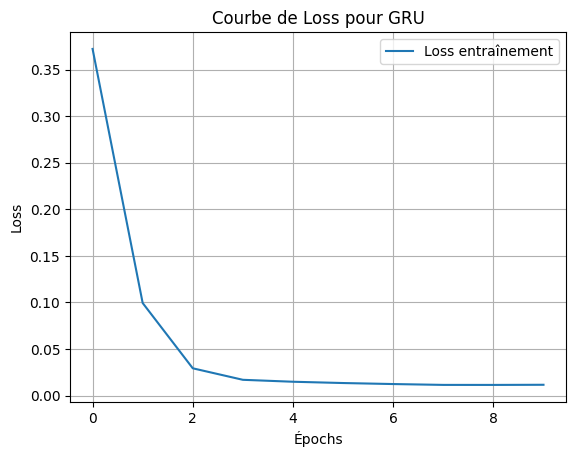

In [107]:
plt.plot(history_LSTM.history['loss'], label='Loss entraînement')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.title('Courbe de Loss pour GRU')
plt.legend()
plt.grid(True)
plt.show()


LSTM
MSE :  0.009296656100871348
MAE :  0.0738659216617685
R² :  0.9689307617678347


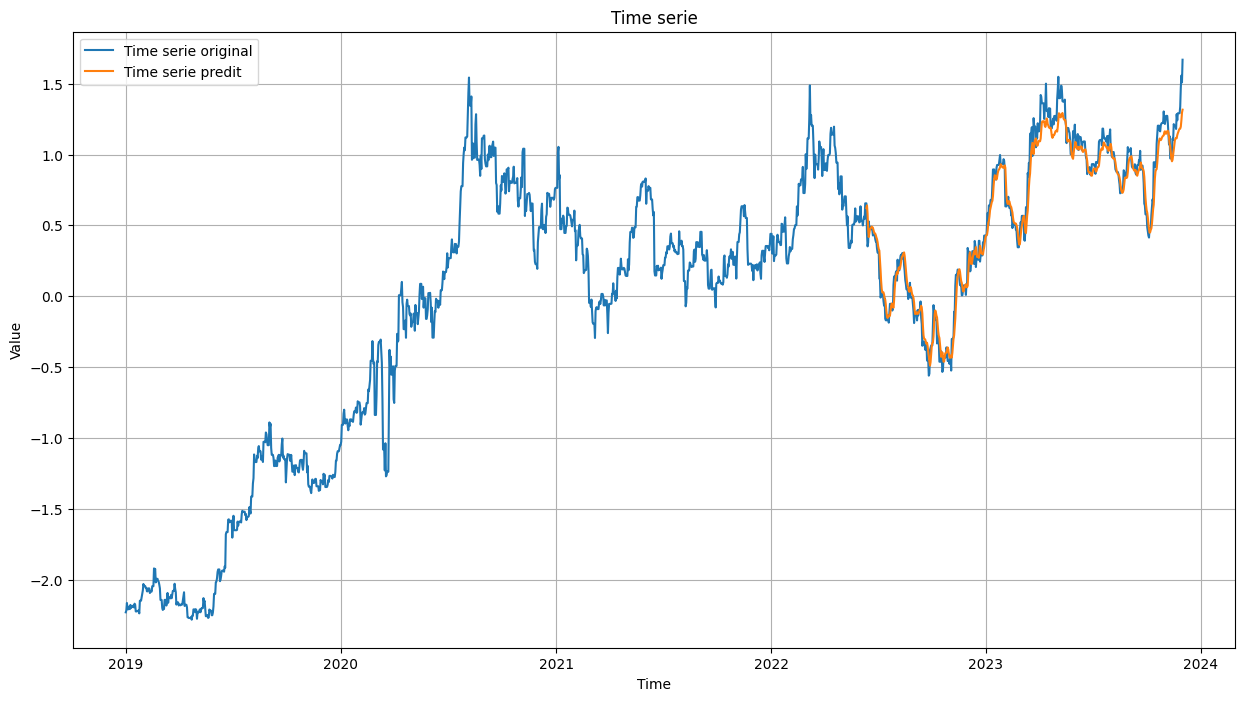

In [104]:
plt.figure(figsize=(15,8))
plot_series(time , Serie_scaled , format = "-",start = 0 , end = None ,label = 'Time serie original' ,title = "Time serie" )
plot_series(time[int(len(Serie)*(1-0.3))+w: ] , y_predict_LSTM[:len(time[int(len(Serie)*(1-0.3))+w: ]),0],start = 0 , end = None , format = "-", label = 'Time serie predit' ,title = "Time serie" )

# évaluation du model
print('LSTM')
MSE_LSTM = mean_squared_error(y_test , y_predict_LSTM)
MAE_LSTM = mean_absolute_error(y_test , y_predict_LSTM)
R2_LSTM = r2_score(y_test , y_predict_LSTM)
print('MSE : ',MSE_LSTM)
print('MAE : ',MAE_LSTM)
print('R² : ',R2_LSTM)

RNN

In [110]:
regressor = keras.Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_trai.shape[1],X_trai.shape[2])))
regressor.add(Dropout(0.2))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(keras.layers.Dense(units = 1,activation='linear'))
Adam=keras.optimizers.Adam(learning_rate=0.04)
# compiling RNN
regressor.compile(optimizer = Adam,
                  loss = "mean_squared_error",
                  metrics=['mae'])

# fitting the model
history_RNN=regressor.fit(X_trai, y_train, epochs = 10, batch_size = 100)
y_predict_RNN=regressor.predict(X_test)

regressor.summary()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - loss: 6.7301 - mae: 2.1443
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 0.3215 - mae: 0.4541
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.1076 - mae: 0.2578
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.0547 - mae: 0.1784
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0419 - mae: 0.1523
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - loss: 0.0411 - mae: 0.1544
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0365 - mae: 0.1429
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0368 - mae: 0.1448
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - loss: 0.0331 - mae: 0.1360
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 294ms/step - loss: 0.0323 - mae: 0.1335
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, 5, 50)               │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,105 (90.26 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,404 (60.18 KB)

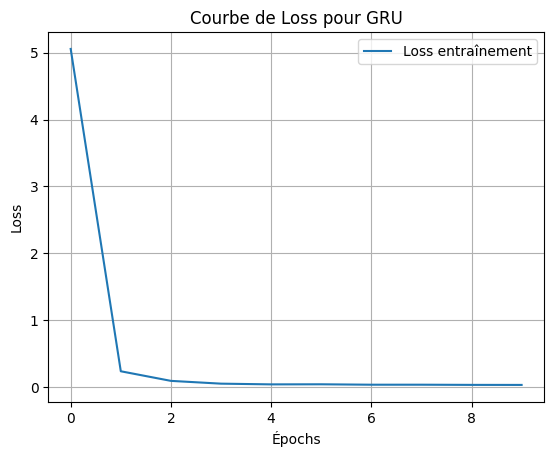

In [111]:
plt.plot(history_RNN.history['loss'], label='Loss entraînement')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.title('Courbe de Loss pour GRU')
plt.legend()
plt.grid(True)
plt.show()


RNN
MSE :  0.01679704245214204
MAE :  0.09963578341443062
R² :  0.9438646210122279


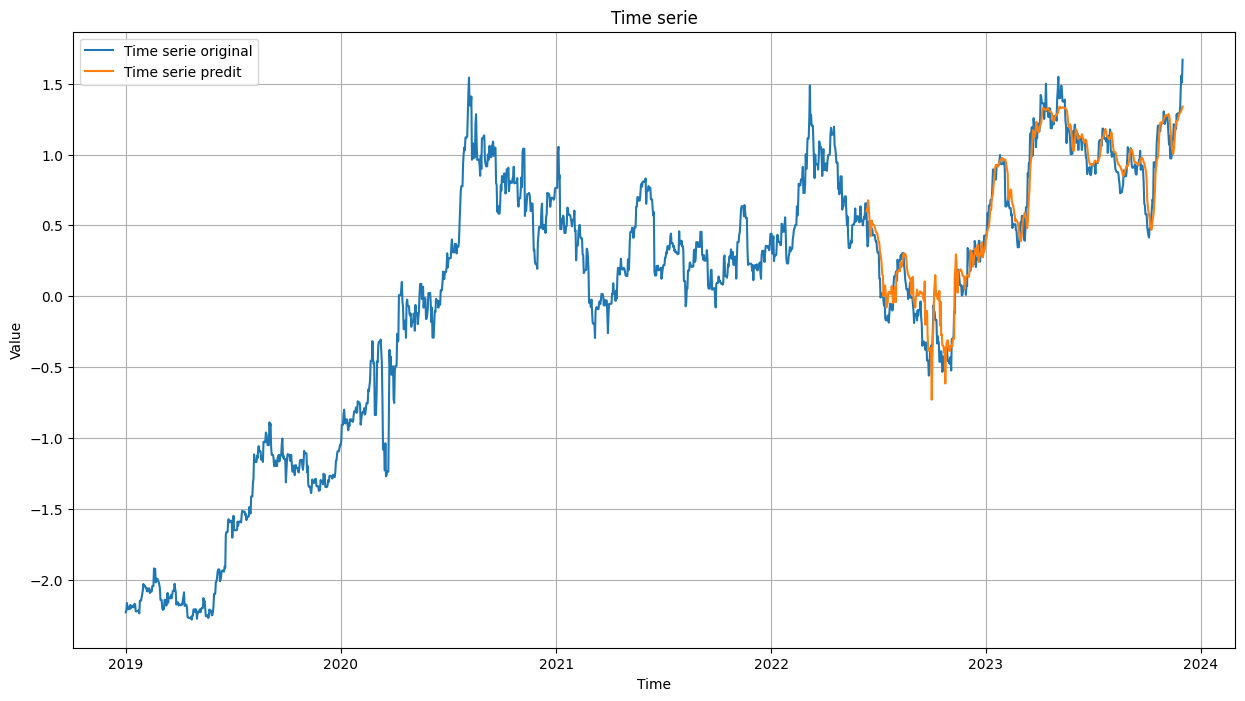

In [102]:
plt.figure(figsize=(15,8))
plot_series(time , Serie_scaled , format = "-",start = 0 , end = None ,label = 'Time serie original' ,title = "Time serie" )
plot_series(time[int(len(Serie)*(1-0.3))+w: ] , y_predict_RNN[:len(time[int(len(Serie)*(1-0.3))+w: ]),0],start = 0 , end = None , format = "-", label = 'Time serie predit' ,title = "Time serie" )
# évaluation du model
print('RNN')
MSE_RNN = mean_squared_error(y_test , y_predict_RNN)
MAE_RNN = mean_absolute_error(y_test , y_predict_RNN)
R2_RNN = r2_score(y_test , y_predict_RNN)
print('MSE : ',MSE_RNN)
print('MAE : ',MAE_RNN)
print('R² : ',R2_RNN)

GRU

In [105]:
model_GRU = keras.Sequential([
    GRU( units=64, activation='tanh', return_sequences=True, input_shape=(X_trai.shape[1],X_trai.shape[2])),
    Dropout(0.2),
    GRU(32, activation='tanh'),
    keras.layers.Dense(1, activation='linear')
])

Adam=keras.optimizers.Adam(learning_rate=0.04)
model_GRU.compile(optimizer=Adam , loss='mean_squared_error',metrics=['mae'])
history_GRU = model_GRU.fit(X_trai,y_train,epochs=10 , verbose=1, batch_size=100)
y_predict_GRU=model_GRU.predict(X_tes)

model_LSTM.summary()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - loss: 0.7842 - mae: 0.5988
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - loss: 0.0697 - mae: 0.2060
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - loss: 0.0227 - mae: 0.1160
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - loss: 0.0124 - mae: 0.0826
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - loss: 0.0116 - mae: 0.0788
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - loss: 0.0105 - mae: 0.0781
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - loss: 0.0113 - mae: 0.0783
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0100 - mae: 0.0754
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 237ms/step - loss: 0.0087 - mae: 0.0680
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - loss: 0.0097 - mae: 0.0739
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 5, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 5, 1)                │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,768 (397.54 KB)

 Trainable params: 33,922 (132.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,846 (265.03 KB)

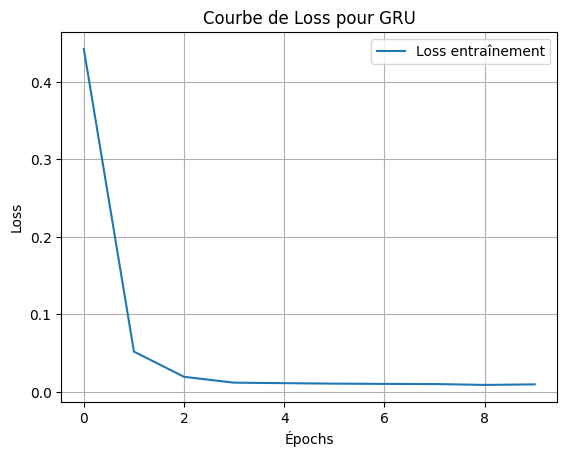

In [112]:
plt.plot(history_GRU.history['loss'], label='Loss entraînement')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.title('Courbe de Loss pour GRU')
plt.legend()
plt.grid(True)
plt.show()


gru
MSE :  0.0062695275590575325
MAE :  0.057531124428796404
R² :  0.9790473646414405


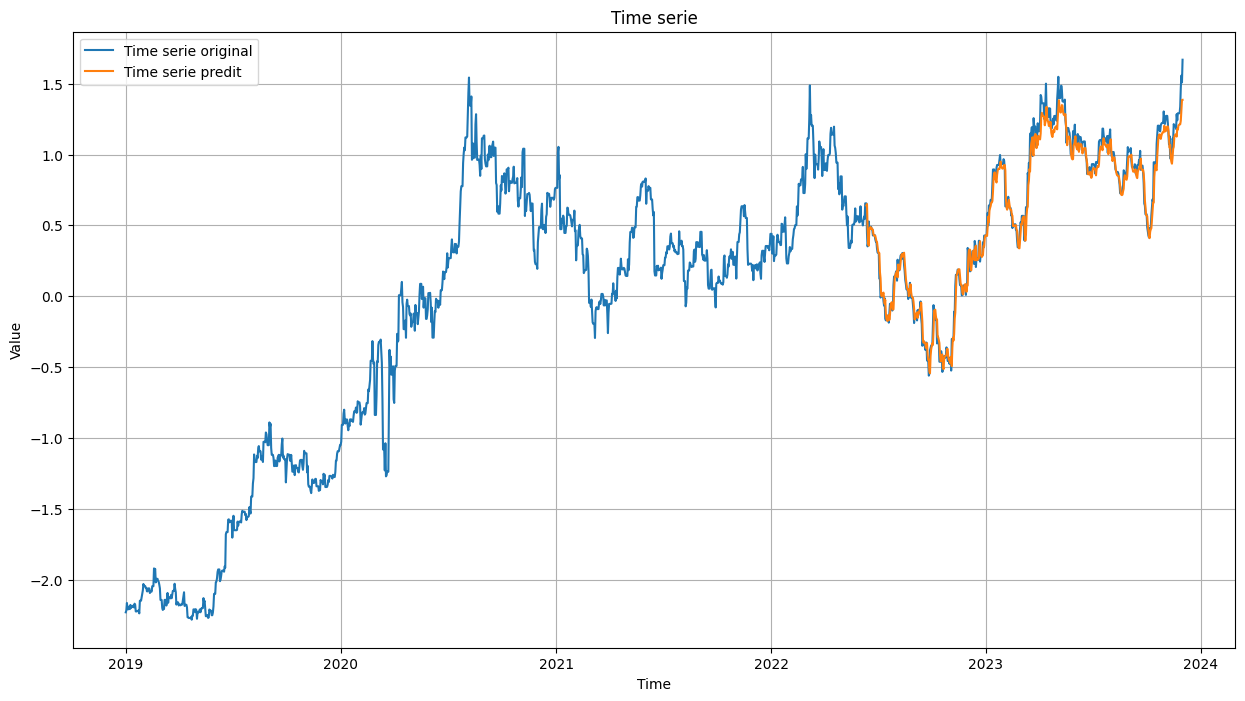

In [106]:
plt.figure(figsize=(15,8))
plot_series(time , Serie_scaled , format = "-",start = 0 , end = None ,label = 'Time serie original' ,title = "Time serie" )
plot_series(time[int(len(Serie)*(1-0.3))+w: ] , y_predict_GRU[:len(time[int(len(Serie)*(1-0.3))+w: ]),0],start = 0 , end = None , format = "-", label = 'Time serie predit' ,title = "Time serie" )

# évaluatino du model
print('gru')
MSE_GRU = mean_squared_error(y_test , y_predict_GRU)
MAE_GRU = mean_absolute_error(y_test , y_predict_GRU)
R2_GRU = r2_score(y_test , y_predict_GRU)
print('MSE : ',MSE_GRU)
print('MAE : ',MAE_GRU)
print('R² : ',R2_GRU)